# Housing Price Prediction_Advance Regression Assignment

### Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file.
 
The company is looking at prospective properties to buy to enter the market.

The company management wants --

- to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.
- to know which variables are significant in predicting the price of a house, and
- to know how well those variables describe the price of a house.
 
The aim is also to determine the optimal value of lambda for ridge and lasso regression.

### Step 1: Reading and Understanding the Data

In [1]:
#suppressing warnings and importing numpy and pandas libraries

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

In [2]:
#Reading the dataset

house_price = pd.read_csv('train.csv')

In [3]:
# Checking the head of the dataset

house_price.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### Inspecting various aspects of dataset

In [4]:
house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
house_price.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Step 2: Data Preparation and Visualization

##### Data preparation for null values

In [6]:
#Dropping the column 'Id' since it has no signficance with the target variable.

house_price.drop(columns=['Id'],axis=1,inplace = True)

In [7]:
#Replacing null values with median for the numeric columns.

house_price["LotFrontage"].fillna((house_price["LotFrontage"].median()), inplace = True)
house_price["MasVnrArea"].fillna((house_price["MasVnrArea"].median()), inplace = True)

In [8]:
#Cross-verifying null values for the categorical columns

house_price[['Alley',"MasVnrType","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","GarageType",
             "GarageFinish","GarageQual","GarageCond","GarageYrBlt","FireplaceQu",'PoolQC',"Fence",'MiscFeature']].head(10)

,Alley,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,GarageType,GarageFinish,GarageQual,GarageCond,GarageYrBlt,FireplaceQu,PoolQC,Fence,MiscFeature
0,NaN,BrkFace,Gd,TA,No,GLQ,Unf,Attchd,RFn,TA,TA,2003.0,NaN,NaN,NaN,NaN
1,NaN,None,Gd,TA,Gd,ALQ,Unf,Attchd,RFn,TA,TA,1976.0,TA,NaN,NaN,NaN
2,NaN,BrkFace,Gd,TA,Mn,GLQ,Unf,Attchd,RFn,TA,TA,2001.0,TA,NaN,NaN,NaN
3,NaN,None,TA,Gd,No,ALQ,Unf,Detchd,Unf,TA,TA,1998.0,Gd,NaN,NaN,NaN
4,NaN,BrkFace,Gd,TA,Av,GLQ,Unf,Attchd,RFn,TA,TA,2000.0,TA,NaN,NaN,NaN
5,NaN,None,Gd,TA,No,GLQ,Unf,Attchd,Unf,TA,TA,1993.0,NaN,NaN,MnPrv,Shed
6,NaN,Stone,Ex,TA,Av,GLQ,Unf,Attchd,RFn,TA,TA,2004.0,Gd,NaN,NaN,NaN
7,NaN,Stone,Gd,TA,Mn,ALQ,BLQ,Attchd,RFn,TA,TA,1973.0,TA,NaN,NaN,Shed
8,NaN,None,TA,TA,No,Unf,Unf,Detchd,Unf,Fa,TA,1931.0,TA,NaN,NaN,NaN
9,NaN,None,TA,TA,No,GLQ,Unf,Attchd,RFn,Gd,TA,1939.0,TA,NaN,NaN,NaN


In [9]:
house_price[['Alley',"MasVnrType","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","GarageType","GarageFinish"
             ,"GarageQual","GarageCond","GarageYrBlt","FireplaceQu",'PoolQC',"Fence",'MiscFeature']].isnull().sum()

Alley           1369
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
GarageYrBlt       81
FireplaceQu      690
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [10]:
#Replacing null values with mode for the categorical columns.

house_price["MasVnrType"].fillna(house_price["MasVnrType"].mode()[0], inplace = True)
house_price["Electrical"].fillna(house_price["Electrical"].mode()[0], inplace = True)

In [11]:
#Replacing null values with 'None' for the categorical columns where NA was read as null in the pandas dataframe.

house_price["Alley"].fillna('None', inplace = True)
house_price["BsmtQual"].fillna('None', inplace = True)
house_price["BsmtCond"].fillna('None', inplace = True)
house_price["BsmtExposure"].fillna('None', inplace = True)
house_price["BsmtFinType1"].fillna('None', inplace = True)
house_price["BsmtFinType2"].fillna('None', inplace = True)
house_price["GarageType"].fillna('None', inplace = True)
house_price["GarageFinish"].fillna('None', inplace = True)
house_price["GarageQual"].fillna('None', inplace = True)
house_price["GarageCond"].fillna('None', inplace = True)
house_price["GarageYrBlt"].fillna(0, inplace = True)
house_price["FireplaceQu"].fillna('None', inplace = True)
house_price["PoolQC"].fillna('None', inplace = True)
house_price["Fence"].fillna('None', inplace = True)
house_price["MiscFeature"].fillna('None', inplace = True)


In [12]:
#Inspecting the dataframe after treating the missing values in the dataframe.
house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

#### Data Visualization

In [13]:
#Importing matplotlib and seaborn libraries for data visualization

import matplotlib.pyplot as plt
import seaborn as sns

##### Visualising numeric variables

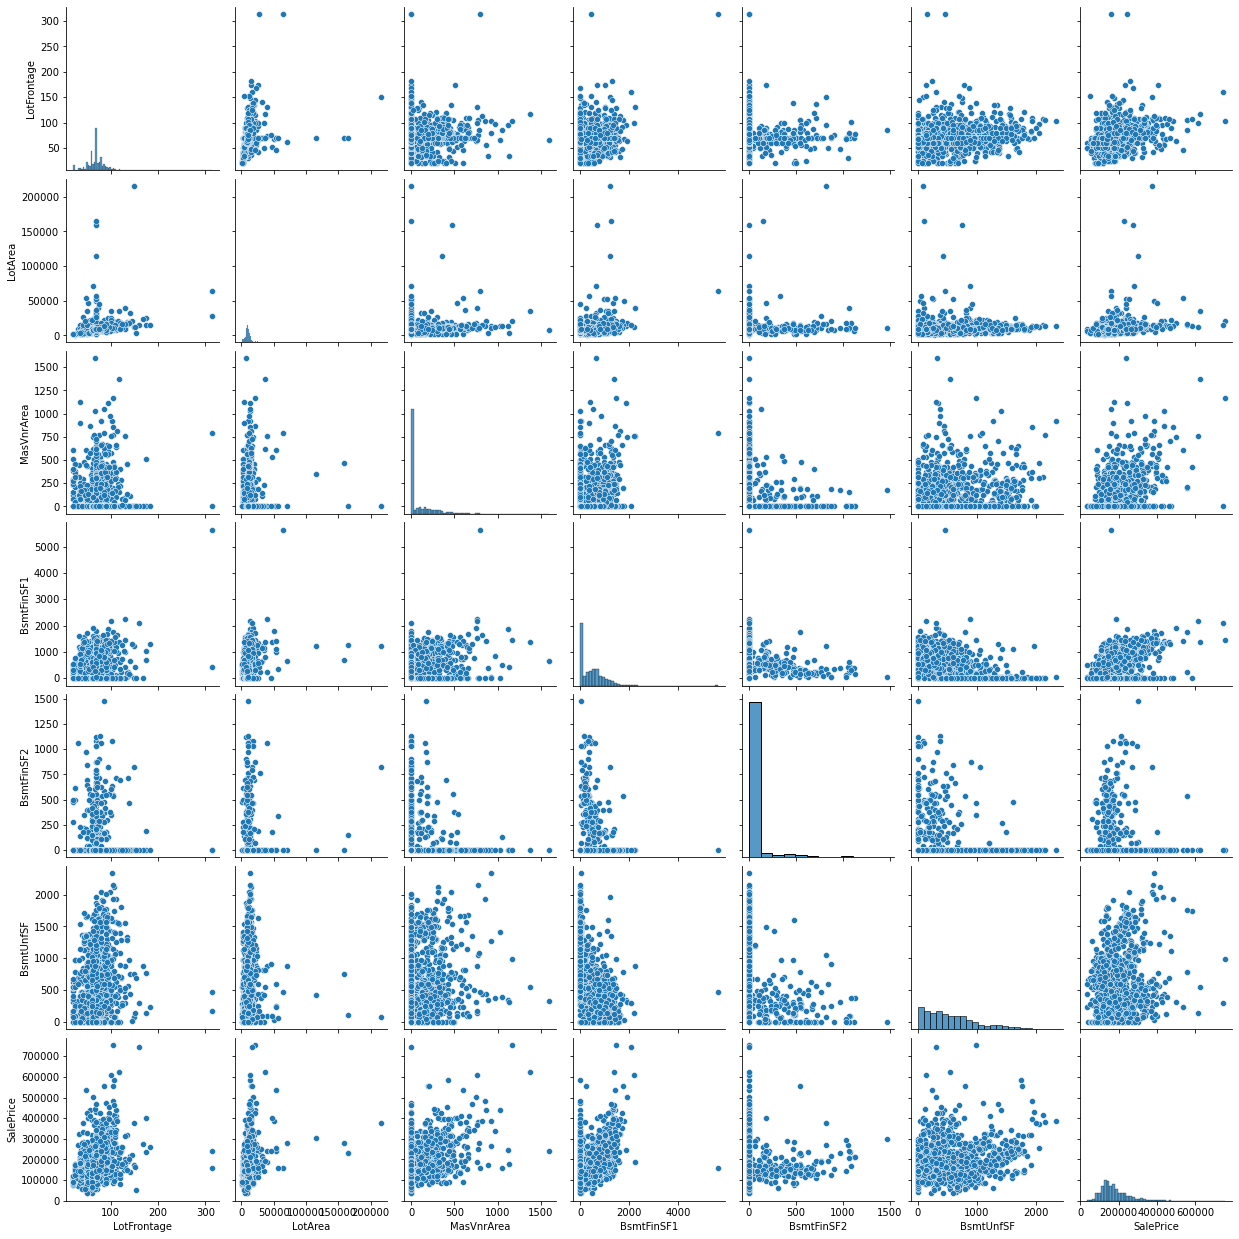

In [14]:
#Plotting pairplot of all the numeric variables

sns.pairplot(house_price[['LotFrontage', 'LotArea', 'MasVnrArea','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','SalePrice']])
plt.show()

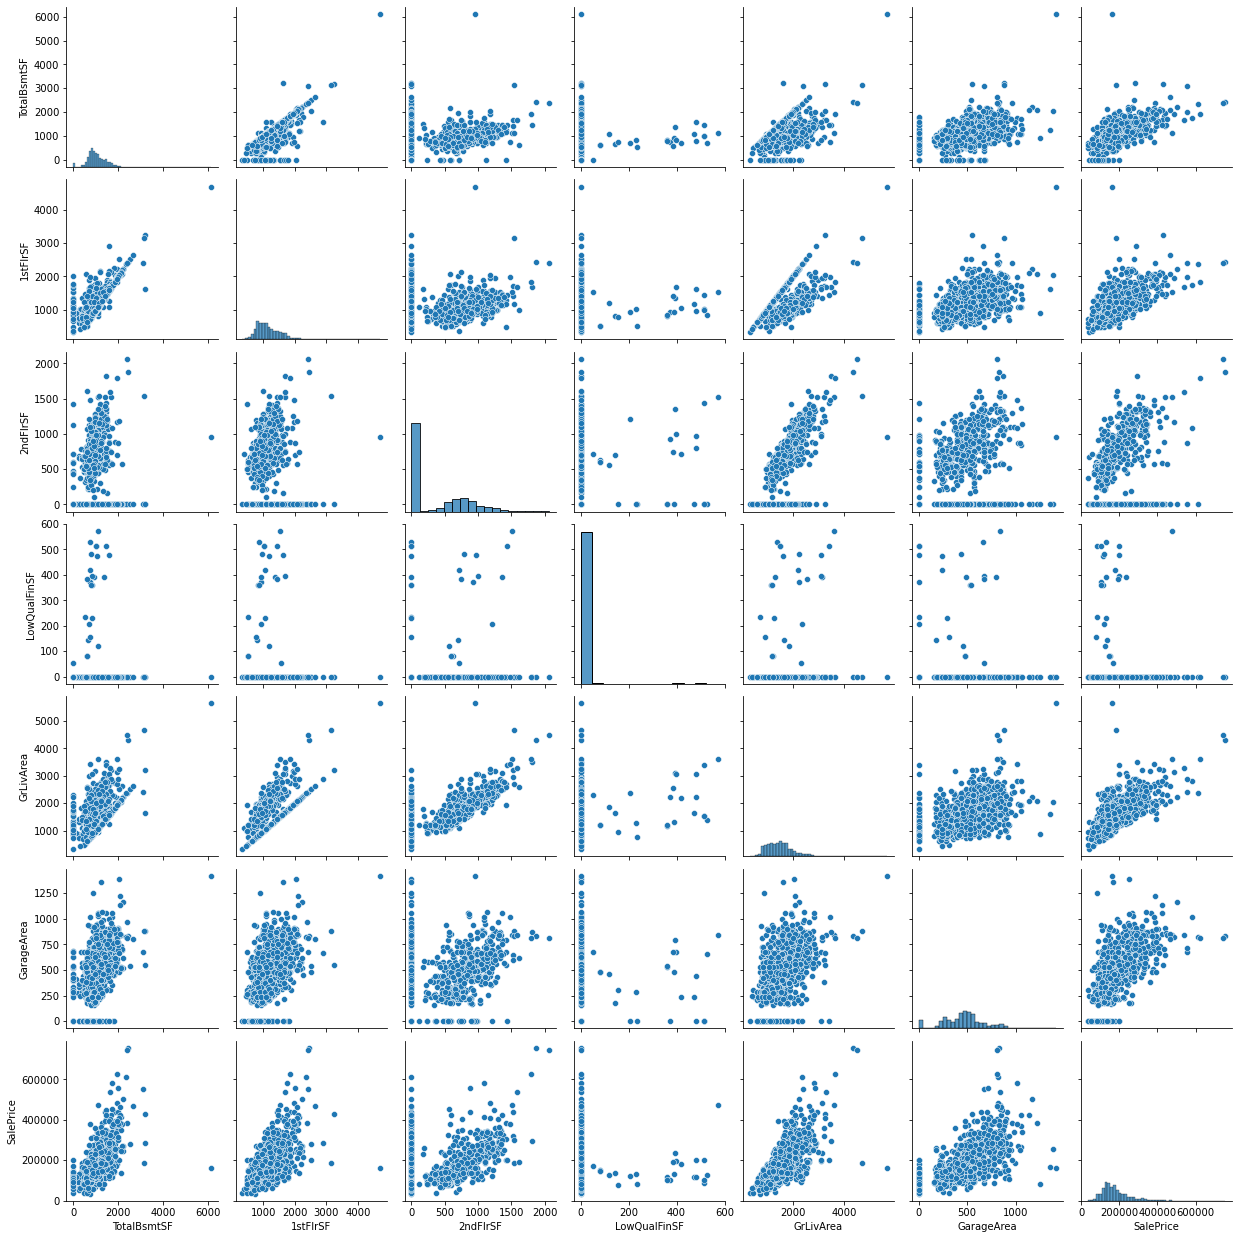

In [15]:
#Plotting pairplot of all the numeric variables

sns.pairplot(house_price[['TotalBsmtSF','1stFlrSF', '2ndFlrSF','LowQualFinSF','GrLivArea','GarageArea','SalePrice']])
plt.show()

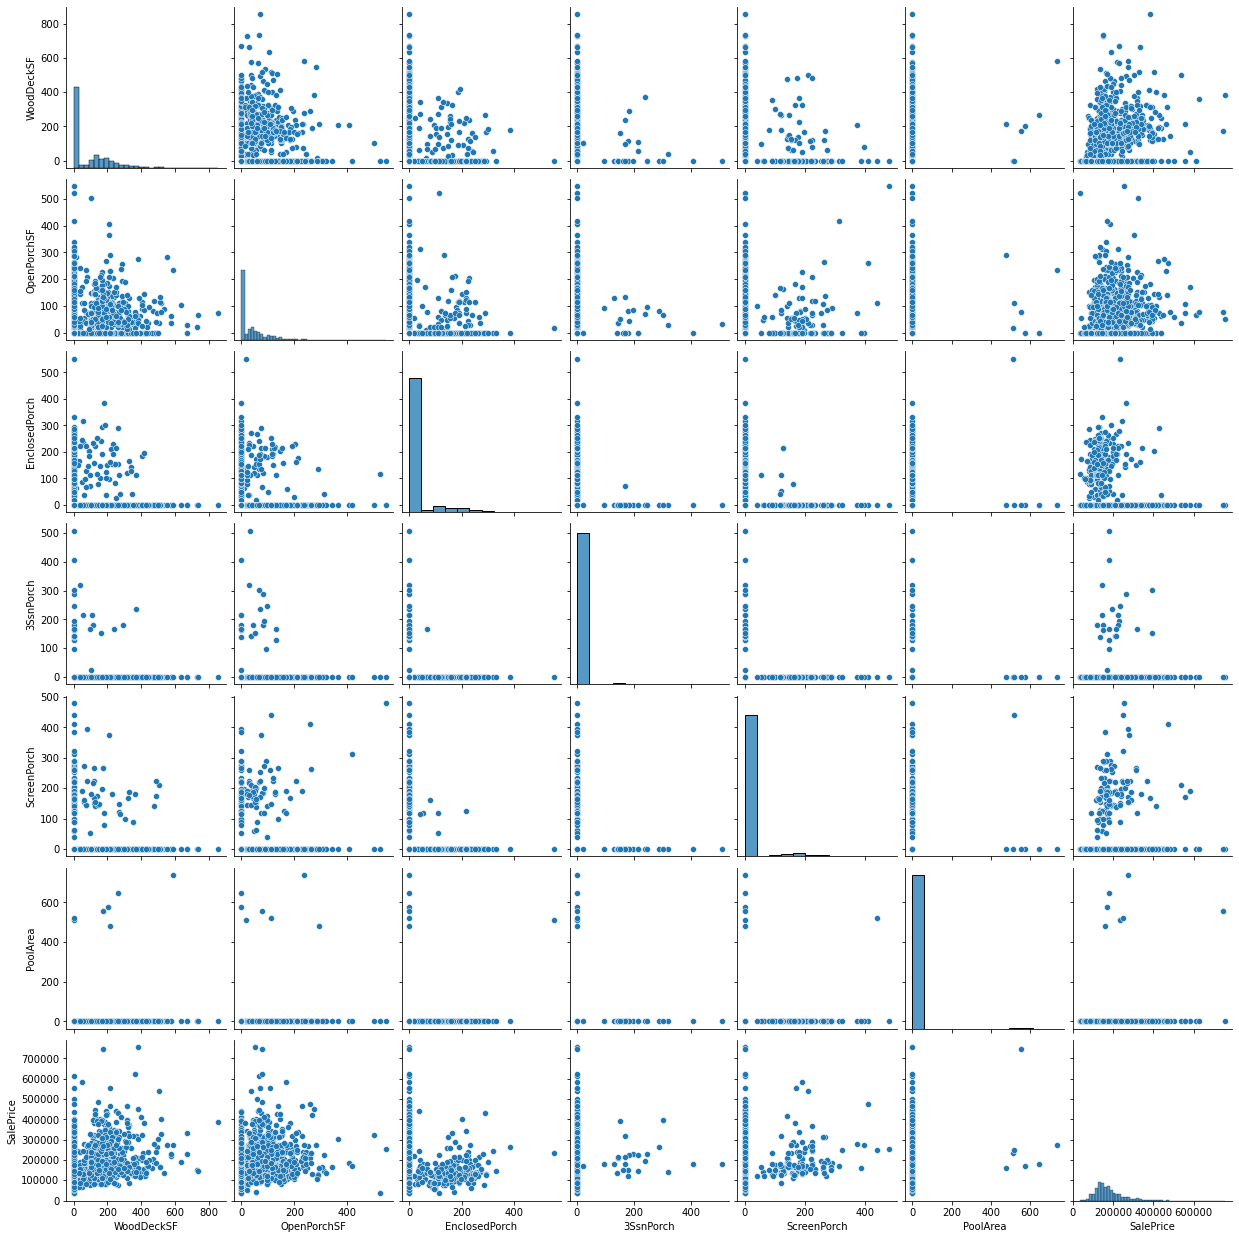

In [16]:
#Plotting pairplot of all the numeric variables

sns.pairplot(house_price[['WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','SalePrice']])
plt.show()

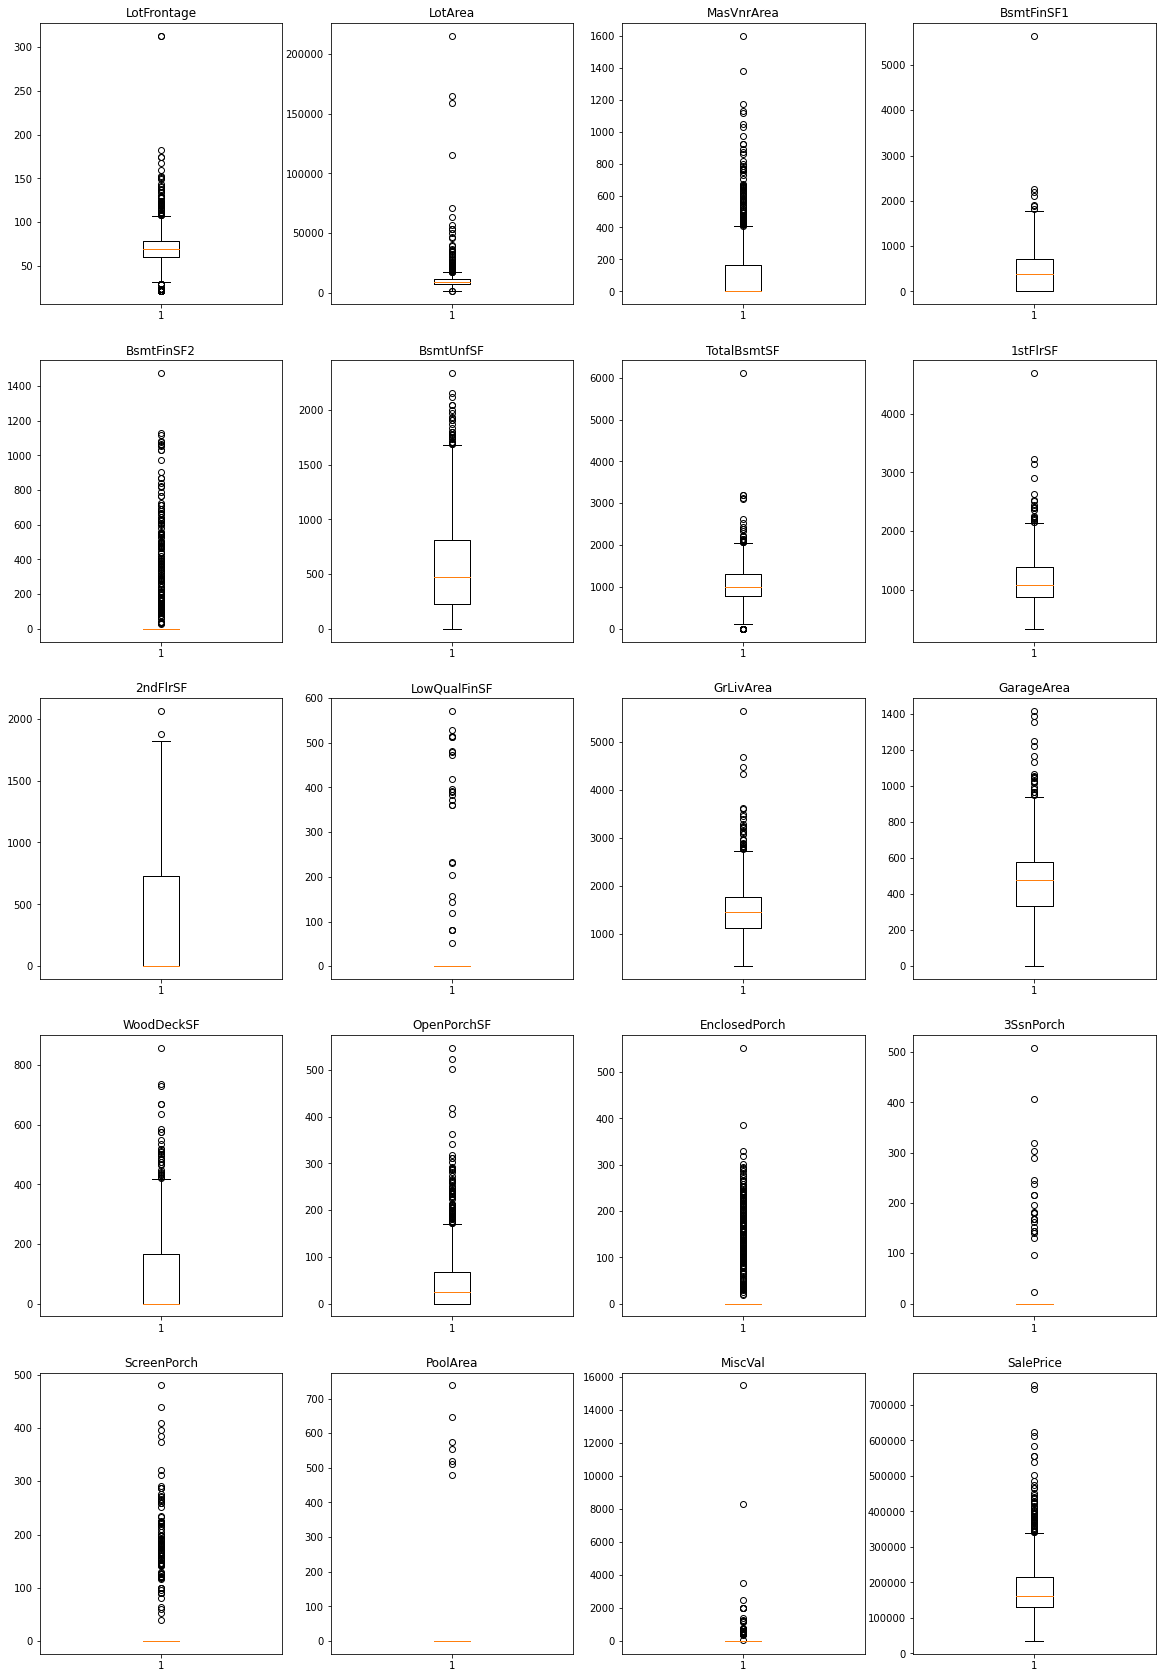

In [17]:
#Plotting boxplot of all the numeric variables

numeric_cols = ['LotFrontage', 'LotArea', 'MasVnrArea','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF','1stFlrSF',
                '2ndFlrSF','LowQualFinSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch',
                'ScreenPorch','PoolArea', 'MiscVal','SalePrice']

plt.figure(figsize=(20,30))

for i in range(0,(len(numeric_cols))):
    plt.subplot(5,4,i+1)
    plt.boxplot(house_price[numeric_cols[i]])
    plt.title(numeric_cols[i])


##### Visualising categorical variables

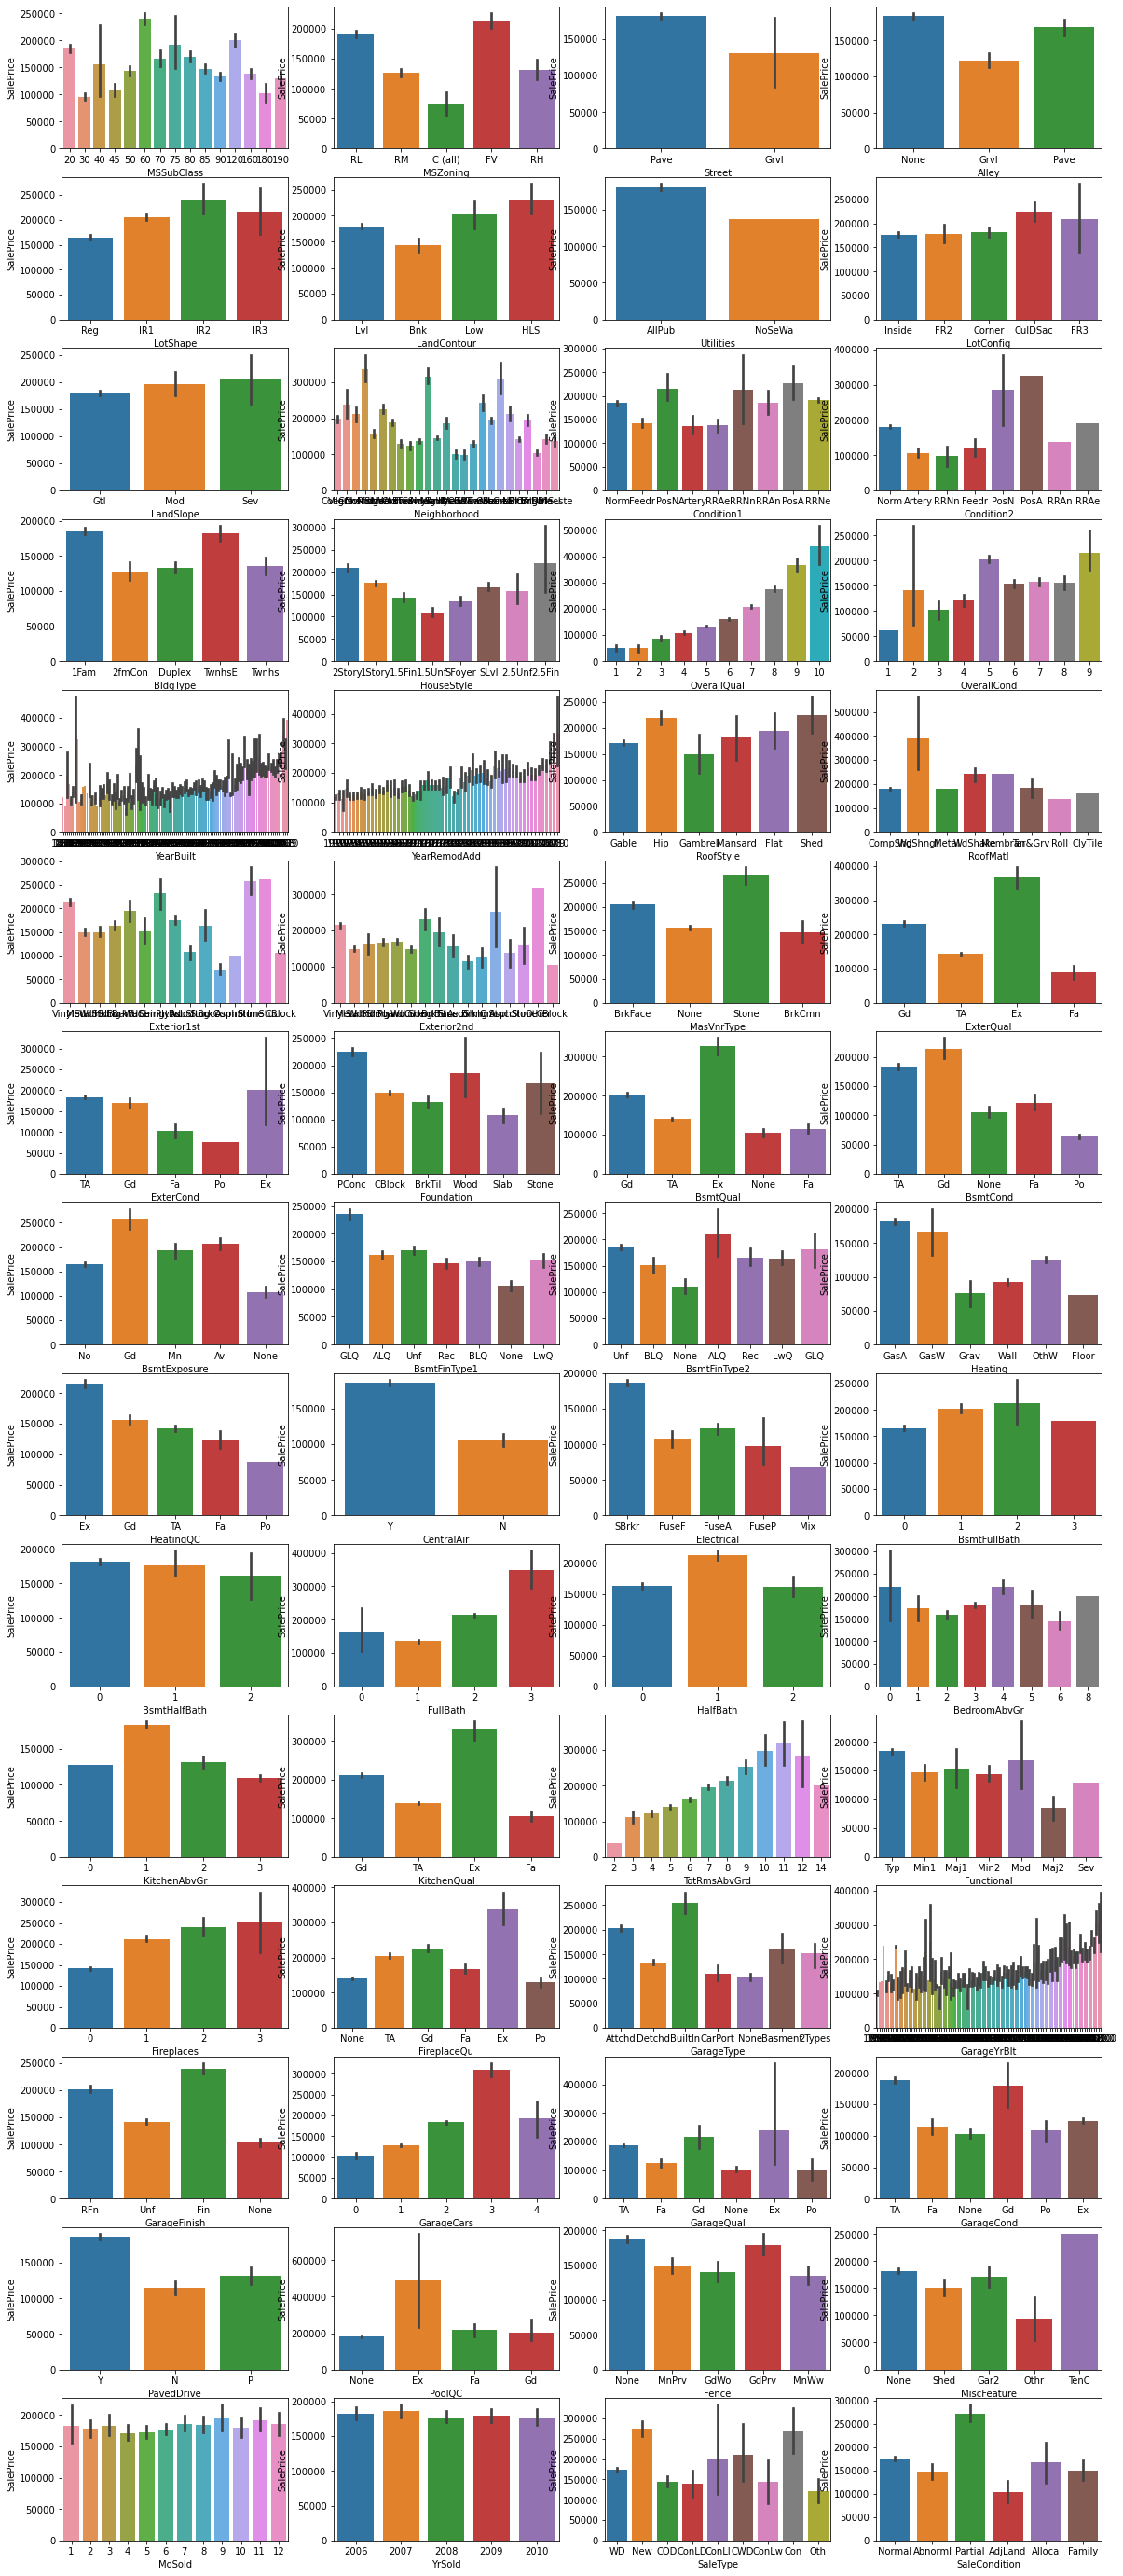

In [18]:
#Plotting barplot of all the categorical variables against the taregt variable 'Price'.

categorical_cols = ['MSSubClass', 'MSZoning', 'Street', 'Alley','LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope'
                    ,'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle','OverallQual', 'OverallCond',
                    'YearBuilt', 'YearRemodAdd', 'RoofStyle','RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType','ExterQual'
                    ,'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond','BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
                    'Heating', 'HeatingQC','CentralAir', 'Electrical','BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
                    'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd','Functional', 'Fireplaces', 'FireplaceQu',
                    'GarageType', 'GarageYrBlt','GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond','PavedDrive','PoolQC',
                    'Fence', 'MiscFeature','MoSold', 'YrSold', 'SaleType', 'SaleCondition']

plt.figure(figsize=(20,50))

for j in range(0,(len(categorical_cols))):
    plt.subplot(15,4,j+1)
    sns.barplot(x = categorical_cols[j], y = 'SalePrice', data = house_price)


#### Data Preparation for categorical data

In [19]:
# Creating dummy variables for some of the categorical variables and dropping the first.

categorical_cols2 = ['MSZoning', 'Street', 'Alley','LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
                     'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle','RoofStyle','RoofMatl','Exterior1st',
                     'Exterior2nd', 'MasVnrType','ExterQual','ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond','BsmtExposure',
                     'BsmtFinType1', 'BsmtFinType2','Heating','HeatingQC','CentralAir', 'Electrical', 'KitchenQual',
                     'Functional', 'FireplaceQu','GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','PavedDrive','PoolQC',
                     'Fence', 'MiscFeature','SaleType', 'SaleCondition']

dummy1 = pd.get_dummies(house_price[categorical_cols2], drop_first=True)
dummy1.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [20]:
# Adding the results to the main dataframe and dropping the redundant columns.

house_price = pd.concat([house_price,dummy1], axis=1)
house_price.drop(columns=categorical_cols2,axis=1,inplace=True)
house_price.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,0,1,0,0,0,1,0


In [21]:
# Creating dummy variables for categorical variables with numeric values.

categorical_cols3 = ['MSSubClass','OverallQual', 'OverallCond','BsmtFullBath','BsmtHalfBath','FullBath', 'HalfBath',
                     'BedroomAbvGr', 'KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','MoSold','YrSold']

house_price[categorical_cols3] = house_price[categorical_cols3].astype('str')

dummy2 = pd.get_dummies(house_price['MSSubClass'], prefix='MSSubClass',drop_first=True)
dummy3 = pd.get_dummies(house_price['OverallQual'], prefix='OverallQual',drop_first=True)
dummy4 = pd.get_dummies(house_price['OverallCond'], prefix='OverallCond',drop_first=True)
dummy5 = pd.get_dummies(house_price['BsmtFullBath'], prefix='BsmtFullBath',drop_first=True)
dummy6 = pd.get_dummies(house_price['BsmtHalfBath'], prefix='BsmtHalfBath',drop_first=True)
dummy7 = pd.get_dummies(house_price['FullBath'], prefix='FullBath',drop_first=True)
dummy8 = pd.get_dummies(house_price['HalfBath'], prefix='HalfBath',drop_first=True)
dummy9 = pd.get_dummies(house_price['BedroomAbvGr'], prefix='BedroomAbvGr',drop_first=True)
dummy10 = pd.get_dummies(house_price['KitchenAbvGr'], prefix='KitchenAbvGr',drop_first=True)
dummy11 = pd.get_dummies(house_price['TotRmsAbvGrd'], prefix='TotRmsAbvGrd',drop_first=True)
dummy12 = pd.get_dummies(house_price['Fireplaces'], prefix='Fireplaces',drop_first=True)
dummy13 = pd.get_dummies(house_price['GarageCars'], prefix='GarageCars',drop_first=True)
dummy14 = pd.get_dummies(house_price['MoSold'], prefix='MoSold',drop_first=True)
dummy15 = pd.get_dummies(house_price['YrSold'], prefix='YrSold',drop_first=True)

# Adding the results to the main dataframe and dropping the redundant columns.

house_price = pd.concat([house_price,dummy2,dummy3,dummy4,dummy5,dummy6,dummy7,dummy8,dummy9,dummy10,dummy11,dummy12,
                     dummy13,dummy14,dummy15], axis=1)
house_price.drop(columns=categorical_cols3,axis=1,inplace=True)
house_price.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010
0,65.0,8450,2003,2003,196.0,706,0,150,856,856,...,0,0,0,0,0,0,0,1,0,0
1,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,...,0,1,0,0,0,0,1,0,0,0
2,68.0,11250,2001,2002,162.0,486,0,434,920,920,...,0,0,0,0,0,1,0,1,0,0
3,60.0,9550,1915,1970,0.0,216,0,540,756,961,...,0,0,0,0,0,0,0,0,0,0
4,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,...,0,0,0,0,0,0,0,1,0,0


In [22]:
# Creating dummy variables for column 'GarageYrBlt'.

house_price["GarageYrBlt_1900_1925"] = house_price["GarageYrBlt"].apply(lambda x: 1 if 1900<= x <= 1925 else 0).astype('int32')
house_price["GarageYrBlt_1926_1950"] = house_price["GarageYrBlt"].apply(lambda x: 1 if 1926<= x <= 1950 else 0).astype('int32')
house_price["GarageYrBlt_1951_1975"] = house_price["GarageYrBlt"].apply(lambda x: 1 if 1951<= x <= 1975 else 0).astype('int32')
house_price["GarageYrBlt_1976_2000"] = house_price["GarageYrBlt"].apply(lambda x: 1 if 1976<= x <= 2000 else 0).astype('int32')
house_price["GarageYrBlt_2001_2025"] = house_price["GarageYrBlt"].apply(lambda x: 1 if 2001<= x <= 2025 else 0).astype('int32')

# Dropping the redundant column.

house_price.drop(columns=['GarageYrBlt'],axis=1,inplace=True)
house_price.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,MoSold_9,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,GarageYrBlt_1900_1925,GarageYrBlt_1926_1950,GarageYrBlt_1951_1975,GarageYrBlt_1976_2000,GarageYrBlt_2001_2025
0,65.0,8450,2003,2003,196.0,706,0,150,856,856,...,0,0,1,0,0,0,0,0,0,1
1,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,...,0,1,0,0,0,0,0,0,1,0
2,68.0,11250,2001,2002,162.0,486,0,434,920,920,...,1,0,1,0,0,0,0,0,0,1
3,60.0,9550,1915,1970,0.0,216,0,540,756,961,...,0,0,0,0,0,0,0,0,1,0
4,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,...,0,0,1,0,0,0,0,0,1,0


In [23]:
# Creating dummy variables for column 'YearBuilt'.

house_price["YearBuilt_1900_1925"] = house_price["YearBuilt"].apply(lambda x: 1 if 1900<= x <= 1925 else 0).astype('int32')
house_price["YearBuilt_1926_1950"] = house_price["YearBuilt"].apply(lambda x: 1 if 1926<= x <= 1950 else 0).astype('int32')
house_price["YearBuilt_1951_1975"] = house_price["YearBuilt"].apply(lambda x: 1 if 1951<= x <= 1975 else 0).astype('int32')
house_price["YearBuilt_1976_2000"] = house_price["YearBuilt"].apply(lambda x: 1 if 1976<= x <= 2000 else 0).astype('int32')
house_price["YearBuilt_2001_2025"] = house_price["YearBuilt"].apply(lambda x: 1 if 2001<= x <= 2025 else 0).astype('int32')

# Dropping the redundant column.

house_price.drop(columns=['YearBuilt'],axis=1,inplace=True)
house_price.head()

,LotFrontage,LotArea,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GarageYrBlt_1900_1925,GarageYrBlt_1926_1950,GarageYrBlt_1951_1975,GarageYrBlt_1976_2000,GarageYrBlt_2001_2025,YearBuilt_1900_1925,YearBuilt_1926_1950,YearBuilt_1951_1975,YearBuilt_1976_2000,YearBuilt_2001_2025
0,65.0,8450,2003,196.0,706,0,150,856,856,854,...,0,0,0,0,1,0,0,0,0,1
1,80.0,9600,1976,0.0,978,0,284,1262,1262,0,...,0,0,0,1,0,0,0,0,1,0
2,68.0,11250,2002,162.0,486,0,434,920,920,866,...,0,0,0,0,1,0,0,0,0,1
3,60.0,9550,1970,0.0,216,0,540,756,961,756,...,0,0,0,1,0,1,0,0,0,0
4,84.0,14260,2000,350.0,655,0,490,1145,1145,1053,...,0,0,0,1,0,0,0,0,1,0


In [24]:
# Creating dummy variables for column 'YearRemodAdd'.

house_price["YearRemodAdd_1926_1950"] = house_price["YearRemodAdd"].apply(lambda x: 1 if 1926<= x <= 1950 else 0).astype('int32')
house_price["YearRemodAdd_1951_1975"] = house_price["YearRemodAdd"].apply(lambda x: 1 if 1951<= x <= 1975 else 0).astype('int32')
house_price["YearRemodAdd_1976_2000"] = house_price["YearRemodAdd"].apply(lambda x: 1 if 1976<= x <= 2000 else 0).astype('int32')

# Dropping the redundant column.

house_price.drop(columns=['YearRemodAdd'],axis=1,inplace=True)
house_price.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,GarageYrBlt_1976_2000,GarageYrBlt_2001_2025,YearBuilt_1900_1925,YearBuilt_1926_1950,YearBuilt_1951_1975,YearBuilt_1976_2000,YearBuilt_2001_2025,YearRemodAdd_1926_1950,YearRemodAdd_1951_1975,YearRemodAdd_1976_2000
0,65.0,8450,196.0,706,0,150,856,856,854,0,...,0,1,0,0,0,0,1,0,0,0
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,...,1,0,0,0,0,1,0,0,0,1
2,68.0,11250,162.0,486,0,434,920,920,866,0,...,0,1,0,0,0,0,1,0,0,0
3,60.0,9550,0.0,216,0,540,756,961,756,0,...,1,0,1,0,0,0,0,0,1,0
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,...,1,0,0,0,0,1,0,0,0,1


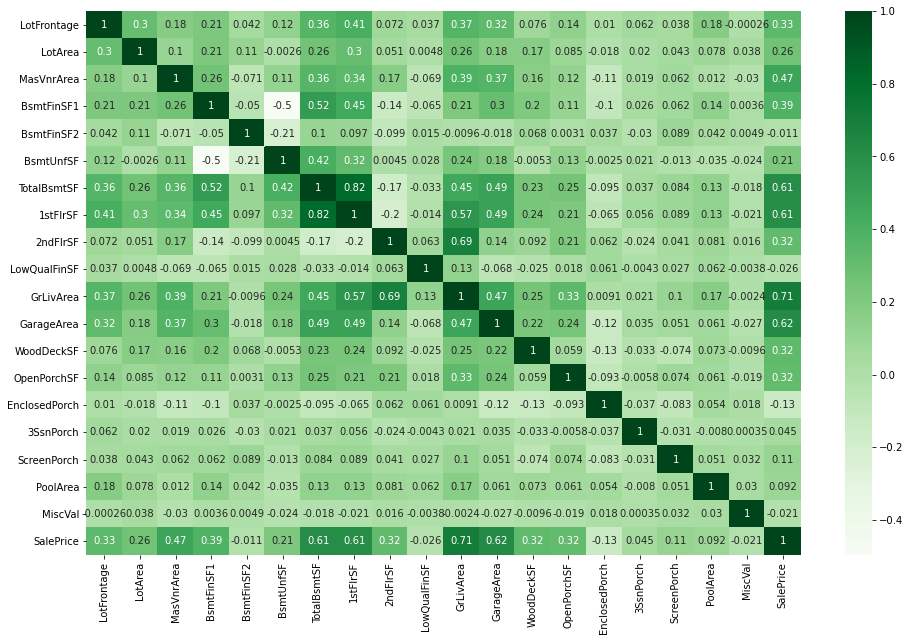

In [25]:
#Plotting correlation heatmap to analyze the correlation between the numeric variables in the dataframe 

house_price_nums = house_price[numeric_cols]

plt.figure(figsize = (16, 10))
sns.heatmap(house_price_nums.corr(), annot = True, cmap="Greens")
plt.show()

### Step 3: Splitting the Data into Training and Testing Sets

In [26]:
#Importing library

from sklearn.model_selection import train_test_split

In [27]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)

house_price_train, house_price_test = train_test_split(house_price, train_size = 0.7, test_size = 0.3, random_state = 100)

### Step 4: Rescaling the training dataframe using Standard scaling method and splitting into X & y

In [28]:
#Importing the scaler and creating and instance of the scaler

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [29]:
#Scaling the training dataframe 

house_price_train[numeric_cols] = scaler.fit_transform(house_price_train[numeric_cols])

# Dividing into X_train & y_train

y_train = house_price_train.pop('SalePrice')
X_train = house_price_train

print (y_train.head())
print (X_train.head())

210    -1.042855
318     1.006390
239    -0.853110
986    -0.802511
1416   -0.732938
Name: SalePrice, dtype: float64
      LotFrontage   LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
210     -0.115302 -0.473765   -0.558025    0.043512   -0.293313  -0.374367   
318      0.926898 -0.056845    0.809137    1.160345   -0.293313  -0.454644   
239     -0.794998 -0.169324   -0.558025   -0.761296   -0.293313   0.171964   
986     -0.477806 -0.502297   -0.558025   -0.963574   -0.293313  -0.175904   
1416    -0.432493  0.082905   -0.558025   -0.963574   -0.293313   0.475233   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  ...  \
210     -0.430911 -0.765065 -0.787597     -0.124502  ...   
318      0.621579  0.511914  2.140556     -0.124502  ...   
239     -0.712011 -0.930972  0.795996     -0.124502  ...   
986     -1.256778 -0.420683  0.669584     -0.124502  ...   
1416    -0.620490  0.195183  1.611926     -0.124502  ...   

      GarageYrBlt_1976_2000  GarageYrBlt_2001_2025  Y

### Step 5: Feature Selection Using RFE

In [30]:
# Importing RFE and LinearRegression

import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [31]:
#Finding the optimum count of independant variables using RFE

rfe_var = np.arange(10,80,5)
r_squared = []
for i in rfe_var:
    lin_reg = LinearRegression()
    rfe = RFE(lin_reg,i)
    rfe = rfe.fit(X_train, y_train)
    col = X_train.columns[rfe.support_]
    X_train_lr = sm.add_constant(X_train[col])
    lr = sm.OLS(y_train,X_train_lr).fit()
    y_train_pred = lr.predict(X_train_lr)
    r_squared.append(r2_score(y_train, y_train_pred))

print(r_squared)

[0.5797537575030466, 0.7238676871093536, 0.7587031056840603, 0.7952443101474047, 0.8298643857439609, 0.8630846431354924, 0.8645116147819867, 0.8704656479859479, 0.8740889286518918, 0.8740889286518918, 0.8744894028133692, 0.8746896944366054, 0.9181169643978565, 0.920965998139066]


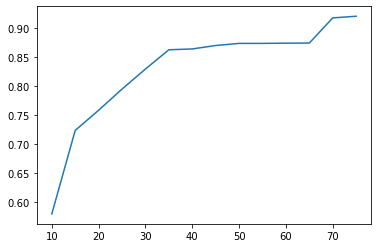

In [32]:
#Plotting count of features against the model r2 score to find the minimum optimum count of independant variables using RFE.

plt.plot(rfe_var,r_squared)
plt.show()

### Step 6: Building the linear model

##### It is clear from the above plot that 35 features is sufficient for the creation of model, we will use the the value 35 for RFE.

In [33]:
#Creating linear model with 35 features

lin_reg = LinearRegression()
rfe = RFE(lin_reg,35)
rfe = rfe.fit(X_train, y_train)
col = X_train.columns[rfe.support_]
X_train_lr1 = sm.add_constant(X_train[col])
lr1 = sm.OLS(y_train,X_train_lr1).fit()

In [34]:
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     177.4
Date:                Wed, 09 Mar 2022   Prob (F-statistic):               0.00
Time:                        18:29:52   Log-Likelihood:                -433.66
No. Observations:                1021   AIC:                             939.3
Df Residuals:                     985   BIC:                             1117.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -28.7188 

In [35]:
#importing vif library
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate the VIFs for the first model

vif = pd.DataFrame()
X = X_train[col]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
21,PoolQC_None,40.94
17,KitchenQual_TA,17.78
16,KitchenQual_Gd,12.18
3,MSZoning_RL,6.35
1,PoolArea,2.46
30,OverallQual_8,2.43
29,OverallQual_7,2.26
28,OverallQual_5,2.24
33,GarageCars_3,2.06
15,KitchenQual_Fa,2.00


In [36]:
#Dropping the column PoolQC_None since it has a high vif value
X_train_new = X_train[col].drop(columns=["PoolQC_None"],axis=1)
X_train_new.head()

,1stFlrSF,PoolArea,MSZoning_FV,MSZoning_RL,LandSlope_Sev,Neighborhood_Crawfor,Neighborhood_NoRidge,Condition2_PosN,Condition2_RRAe,BldgType_Duplex,...,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_7,OverallQual_8,OverallQual_9,FullBath_3,GarageCars_3,GarageCars_4
210,-0.765065,-0.062302,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
318,0.511914,-0.062302,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
239,-0.930972,-0.062302,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
986,-0.420683,-0.062302,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1416,0.195183,-0.062302,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


##### Rebuilding the model after dropping the column PoolQC_None

In [37]:
X_train_lr2 = sm.add_constant(X_train_new)

#Running linear model
lr2 = sm.OLS(y_train,X_train_lr2).fit()
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     179.1
Date:                Wed, 09 Mar 2022   Prob (F-statistic):               0.00
Time:                        18:29:53   Log-Likelihood:                -442.71
No. Observations:                1021   AIC:                             955.4
Df Residuals:                     986   BIC:                             1128.
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0553 

In [38]:
# Calculate the VIFs for the second model

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,MSZoning_RL,5.47
17,KitchenQual_TA,4.49
16,KitchenQual_Gd,3.89
1,PoolArea,2.29
27,OverallQual_5,2.16
29,OverallQual_8,2.14
28,OverallQual_7,2.10
32,GarageCars_3,2.04
0,1stFlrSF,1.83
19,PoolQC_Fa,1.80


In [39]:
#Dropping the column MSZoning_RL since it has a high vif value
X_train_new = X_train_new.drop(columns=["MSZoning_RL"],axis=1)
X_train_new.head()

,1stFlrSF,PoolArea,MSZoning_FV,LandSlope_Sev,Neighborhood_Crawfor,Neighborhood_NoRidge,Condition2_PosN,Condition2_RRAe,BldgType_Duplex,RoofStyle_Mansard,...,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_7,OverallQual_8,OverallQual_9,FullBath_3,GarageCars_3,GarageCars_4
210,-0.765065,-0.062302,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
318,0.511914,-0.062302,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
239,-0.930972,-0.062302,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
986,-0.420683,-0.062302,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1416,0.195183,-0.062302,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


##### Rebuilding the model after dropping the column MSZoning_RL

In [40]:
X_train_lr3 = sm.add_constant(X_train_new)

#Running linear model
lr3 = sm.OLS(y_train,X_train_lr3).fit()
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     174.4
Date:                Wed, 09 Mar 2022   Prob (F-statistic):               0.00
Time:                        18:29:55   Log-Likelihood:                -467.88
No. Observations:                1021   AIC:                             1004.
Df Residuals:                     987   BIC:                             1171.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2551 

In [41]:
# Calculate the VIFs for the third model

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,KitchenQual_TA,2.69
15,KitchenQual_Gd,2.53
1,PoolArea,2.29
26,OverallQual_5,2.14
28,OverallQual_8,2.09
27,OverallQual_7,2.05
31,GarageCars_3,2.04
18,PoolQC_Fa,1.80
0,1stFlrSF,1.74
22,OverallQual_10,1.69


In [42]:
#Dropping the column RoofMatl_Roll since it has a high p value
X_train_new = X_train_new.drop(columns=["RoofMatl_Roll"],axis=1)
X_train_new.head()

,1stFlrSF,PoolArea,MSZoning_FV,LandSlope_Sev,Neighborhood_Crawfor,Neighborhood_NoRidge,Condition2_PosN,Condition2_RRAe,BldgType_Duplex,RoofStyle_Mansard,...,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_7,OverallQual_8,OverallQual_9,FullBath_3,GarageCars_3,GarageCars_4
210,-0.765065,-0.062302,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
318,0.511914,-0.062302,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
239,-0.930972,-0.062302,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
986,-0.420683,-0.062302,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1416,0.195183,-0.062302,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


##### Rebuilding the model after dropping the column RoofMatl_Roll

In [43]:
X_train_lr4 = sm.add_constant(X_train_new)

#Running linear model
lr4 = sm.OLS(y_train,X_train_lr4).fit()
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     179.7
Date:                Wed, 09 Mar 2022   Prob (F-statistic):               0.00
Time:                        18:29:56   Log-Likelihood:                -468.58
No. Observations:                1021   AIC:                             1003.
Df Residuals:                     988   BIC:                             1166.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2550 

In [44]:
#Dropping the column RoofStyle_Mansard since it has a high p value
X_train_new = X_train_new.drop(columns=["RoofStyle_Mansard"],axis=1)
X_train_new.head()

,1stFlrSF,PoolArea,MSZoning_FV,LandSlope_Sev,Neighborhood_Crawfor,Neighborhood_NoRidge,Condition2_PosN,Condition2_RRAe,BldgType_Duplex,RoofMatl_WdShngl,...,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_7,OverallQual_8,OverallQual_9,FullBath_3,GarageCars_3,GarageCars_4
210,-0.765065,-0.062302,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
318,0.511914,-0.062302,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
239,-0.930972,-0.062302,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
986,-0.420683,-0.062302,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1416,0.195183,-0.062302,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


##### Rebuilding the model after dropping the column RoofStyle_Mansard

In [45]:
X_train_lr5 = sm.add_constant(X_train_new)

#Running linear model
lr5 = sm.OLS(y_train,X_train_lr5).fit()
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     185.4
Date:                Wed, 09 Mar 2022   Prob (F-statistic):               0.00
Time:                        18:29:56   Log-Likelihood:                -469.33
No. Observations:                1021   AIC:                             1003.
Df Residuals:                     989   BIC:                             1160.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2551 

In [46]:
#Dropping the column Functional_Sev since it has a high p value
X_train_new = X_train_new.drop(columns=["Functional_Sev"],axis=1)
X_train_new.head()

,1stFlrSF,PoolArea,MSZoning_FV,LandSlope_Sev,Neighborhood_Crawfor,Neighborhood_NoRidge,Condition2_PosN,Condition2_RRAe,BldgType_Duplex,RoofMatl_WdShngl,...,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_7,OverallQual_8,OverallQual_9,FullBath_3,GarageCars_3,GarageCars_4
210,-0.765065,-0.062302,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
318,0.511914,-0.062302,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
239,-0.930972,-0.062302,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
986,-0.420683,-0.062302,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1416,0.195183,-0.062302,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


##### Rebuilding the model after dropping the column Functional_Sev

In [47]:
X_train_lr6 = sm.add_constant(X_train_new)

#Running linear model
lr6 = sm.OLS(y_train,X_train_lr6).fit()
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     191.4
Date:                Wed, 09 Mar 2022   Prob (F-statistic):               0.00
Time:                        18:29:56   Log-Likelihood:                -470.24
No. Observations:                1021   AIC:                             1002.
Df Residuals:                     990   BIC:                             1155.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2539 

In [48]:
#Dropping the column MSZoning_FV since it has a high p value
X_train_new = X_train_new.drop(columns=["MSZoning_FV"],axis=1)
X_train_new.head()

,1stFlrSF,PoolArea,LandSlope_Sev,Neighborhood_Crawfor,Neighborhood_NoRidge,Condition2_PosN,Condition2_RRAe,BldgType_Duplex,RoofMatl_WdShngl,BsmtCond_Po,...,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_7,OverallQual_8,OverallQual_9,FullBath_3,GarageCars_3,GarageCars_4
210,-0.765065,-0.062302,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
318,0.511914,-0.062302,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
239,-0.930972,-0.062302,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
986,-0.420683,-0.062302,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1416,0.195183,-0.062302,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


##### Rebuilding the model after dropping the column MSZoning_FV

In [49]:
X_train_lr7 = sm.add_constant(X_train_new)

#Running linear model
lr7 = sm.OLS(y_train,X_train_lr7).fit()
print(lr7.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     197.3
Date:                Wed, 09 Mar 2022   Prob (F-statistic):               0.00
Time:                        18:29:57   Log-Likelihood:                -472.02
No. Observations:                1021   AIC:                             1004.
Df Residuals:                     991   BIC:                             1152.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2517 

In [50]:
# Calculate the VIFs for the final model

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,KitchenQual_TA,2.67
12,KitchenQual_Gd,2.48
1,PoolArea,2.29
22,OverallQual_5,2.12
24,OverallQual_8,2.05
27,GarageCars_3,2.03
23,OverallQual_7,2.02
14,PoolQC_Fa,1.80
18,OverallQual_10,1.67
0,1stFlrSF,1.67


#### Now the VIFs (VIF< 5) and p-values (P<0.05) both are within an acceptable range. Hence, the final model lr7 can be considered the best suited for our predictions.

### Step 7: Ridge Regression

In [51]:
#Importing Ridge
from sklearn.linear_model import Ridge

# Applying Ridge Regression with varying the hyperparameter 'lambda'

lambdas_ridge = [0.0001,0.001, 0.01, 0.1, 1, 10, 100, 1000]

for i in lambdas_ridge:
    ridgereg = Ridge(alpha = i)
    ridgereg.fit(X_train_new, y_train)
    y_train_pred_ridge = ridgereg.predict(X_train_new)
    print("lambda_ridge = ",i," ; ","r2 score = " + str(r2_score(y_train, y_train_pred_ridge))) 

lambda_ridge =  0.0001  ;  r2 score = 0.8524004119323354
lambda_ridge =  0.001  ;  r2 score = 0.8524003033164358
lambda_ridge =  0.01  ;  r2 score = 0.8523897701057396
lambda_ridge =  0.1  ;  r2 score = 0.8515927226650831
lambda_ridge =  1  ;  r2 score = 0.8353996489369178
lambda_ridge =  10  ;  r2 score = 0.793631282794065
lambda_ridge =  100  ;  r2 score = 0.6879417195290368
lambda_ridge =  1000  ;  r2 score = 0.44461572739710287


In [52]:
# Ridge Regression for the optimum lambda value 10

ridgereg = Ridge(alpha = 10)
ridgereg.fit(X_train_new, y_train)
y_train_pred_ridge = ridgereg.predict(X_train_new)
print("lambda_ridge = 10"," ; ","r2 score = " + str(r2_score(y_train, y_train_pred_ridge))) 

lambda_ridge = 10  ;  r2 score = 0.793631282794065


### Step 8: Lasso Regression

In [53]:
# Importing Lasso
from sklearn.linear_model import Lasso

# Applying lasso Regression with varying the hyperparameter 'lambda'

lambdas_lasso = [0.0001,0.001, 0.01, 0.1, 1, 10, 100, 1000]

for i in lambdas_lasso:
    lassoreg = Lasso(alpha = i)
    lassoreg.fit(X_train_new, y_train)
    y_train_pred_lasso = lassoreg.predict(X_train_new)
    print("lambda_lasso = ",i," ; ","r2 score = " + str(r2_score(y_train, y_train_pred_lasso))) 

lambda_lasso =  0.0001  ;  r2 score = 0.8522977822043452
lambda_lasso =  0.001  ;  r2 score = 0.8443016193576985
lambda_lasso =  0.01  ;  r2 score = 0.7568014470113725
lambda_lasso =  0.1  ;  r2 score = 0.4986640779028484
lambda_lasso =  1  ;  r2 score = 0.0
lambda_lasso =  10  ;  r2 score = 0.0
lambda_lasso =  100  ;  r2 score = 0.0
lambda_lasso =  1000  ;  r2 score = 0.0


In [54]:
# Lasso Regression for the optimum lambda value 0.01

lassoreg = Lasso(alpha = 0.01)
lassoreg.fit(X_train_new, y_train)
y_train_pred_lasso = lassoreg.predict(X_train_new)
print("lambda_lasso = 0.01"," ; ","r2 score = " + str(r2_score(y_train, y_train_pred_lasso)))

lambda_lasso = 0.01  ;  r2 score = 0.7568014470113725


### Step 9: Residual Analysis of the train data

In [55]:
#using the final models on train data to predict y_train_pred values

#Linear Regression
y_train_pred_linreg = lr7.predict(X_train_lr7)

#Ridge Regression
y_train_pred_ridge = ridgereg.predict(X_train_new)

#Lasso Regression
y_train_pred_lasso = lassoreg.predict(X_train_new)

Text(0.5, 1.0, 'Linear_reg')

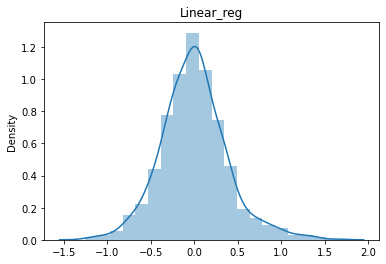

In [56]:
# Plotting the histogram of the error terms of Linear Regression
sns.distplot((y_train - y_train_pred_linreg), bins = 20)
plt.title("Linear_reg")

Text(0.5, 1.0, 'Ridge_reg')

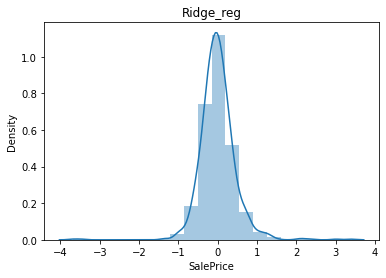

In [57]:
# Plotting the histogram of the error terms of Ridge Regression
sns.distplot((y_train - y_train_pred_ridge), bins = 20)
plt.title("Ridge_reg")

Text(0.5, 1.0, 'Lasso_reg')

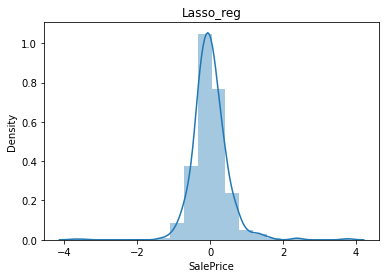

In [58]:
# Plotting the histogram of the error terms of Lasso Regression
sns.distplot((y_train - y_train_pred_lasso), bins = 20)
plt.title("Lasso_reg")

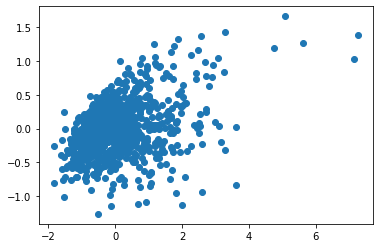

In [59]:
# checking error terms for patterns in Linear_reg
plt.scatter(y_train,(y_train - y_train_pred_linreg))
plt.show()

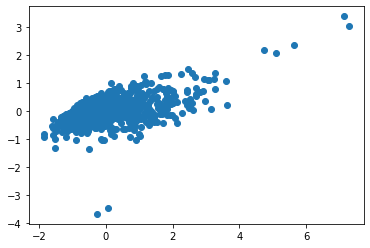

In [60]:
# checking error terms for patterns in Ridge_reg
plt.scatter(y_train,(y_train - y_train_pred_ridge))
plt.show()

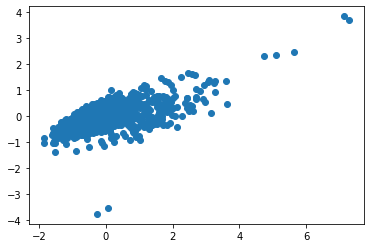

In [61]:
# checking error terms for patterns in Lasso_reg
plt.scatter(y_train,(y_train - y_train_pred_lasso))
plt.show()

### Step 10: Making Predictions on the Test set Using the Final Models

In [62]:
### Step : Rescaling the test dataframe using Standard scaling method and splitting into X & y

house_price_test[numeric_cols] = scaler.transform(house_price_test[numeric_cols])

# Dividing into X_test & y_test

y_test = house_price_test.pop('SalePrice')
X_test = house_price_test

print (y_test.head())
print (X_test.head())

1436   -0.758237
57      0.203137
780    -0.056181
382     0.418181
1170   -0.119430
Name: SalePrice, dtype: float64
      LotFrontage   LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
1436    -0.432493 -0.144189   -0.558025    0.361992   -0.293313  -0.704396   
57       0.881585  0.112505   -0.558025   -0.963574   -0.293313   0.660317   
780     -0.296554 -0.253368   -0.355087   -0.963574   -0.293313   1.500998   
382      0.428455 -0.120412   -0.558025   -0.963574   -0.293313   0.836481   
1170     0.292515 -0.058786   -0.558025    0.159714   -0.293313   0.022559   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  ...  \
1436    -0.430911 -0.765065 -0.787597     -0.124502  ...   
57      -0.439628 -0.775120  1.189021     -0.124502  ...   
780      0.381881  0.212779 -0.787597     -0.124502  ...   
382     -0.267481 -0.576535  1.184425     -0.124502  ...   
1170     0.074633 -0.126576 -0.787597     -0.124502  ...   

      GarageYrBlt_1976_2000  GarageYrBlt_2001_2025  Y

In [63]:
test_columns = X_train_new.columns
test_columns

Index(['1stFlrSF', 'PoolArea', 'LandSlope_Sev', 'Neighborhood_Crawfor',
       'Neighborhood_NoRidge', 'Condition2_PosN', 'Condition2_RRAe',
       'BldgType_Duplex', 'RoofMatl_WdShngl', 'BsmtCond_Po', 'BsmtExposure_Gd',
       'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA', 'PoolQC_Fa',
       'PoolQC_Gd', 'SaleType_Con', 'SaleType_New', 'OverallQual_10',
       'OverallQual_2', 'OverallQual_3', 'OverallQual_4', 'OverallQual_5',
       'OverallQual_7', 'OverallQual_8', 'OverallQual_9', 'FullBath_3',
       'GarageCars_3', 'GarageCars_4'],
      dtype='object')

In [64]:
# Updating X_test dataframe by dropping the variables as analyzed from the above models

X_test_new = X_test[test_columns]

In [65]:
# Making predictions using the test set

#Linear Regression
X_test_lr7 = sm.add_constant(X_test_new)
y_test_pred_linreg = lr7.predict(X_test_lr7)

In [66]:
#Ridge Regression
y_test_pred_ridge = ridgereg.predict(X_test_new)

#Lasso Regression
y_test_pred_lasso = lassoreg.predict(X_test_new)

### Step 11: Model Evaluation

In [67]:
#Checking R_squared for linear, Ridge & Lasso Regression models
print("The R_squared for linear Regression is = ",(r2_score(y_test, y_test_pred_linreg)))
print("The R_squared for Ridge Regression is = ",(r2_score(y_test, y_test_pred_ridge)))
print("The R_squared for Lasso Regression is = ",(r2_score(y_test, y_test_pred_lasso)))

The R_squared for linear Regression is =  0.6339649040025833
The R_squared for Ridge Regression is =  0.7734864343241297
The R_squared for Lasso Regression is =  0.7383531546244263


Text(0, 0.5, 'y_test_pred_linreg')

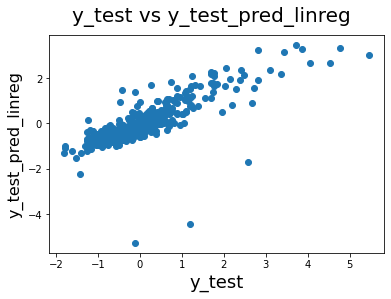

In [68]:
# Plotting y_test and y_test_pred_linreg to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred_linreg)
fig.suptitle('y_test vs y_test_pred_linreg', fontsize = 20)               
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_test_pred_linreg', fontsize = 16)

Text(0, 0.5, 'y_test_pred_ridge')

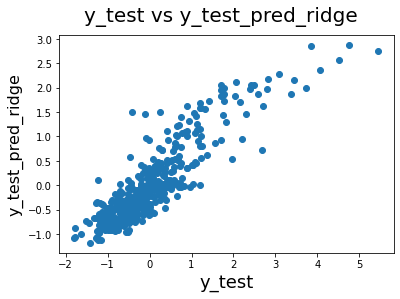

In [69]:
# Plotting y_test and y_test_pred_ridge to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred_ridge)
fig.suptitle('y_test vs y_test_pred_ridge', fontsize = 20)               
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_test_pred_ridge', fontsize = 16)

Text(0, 0.5, 'y_test_pred_lasso')

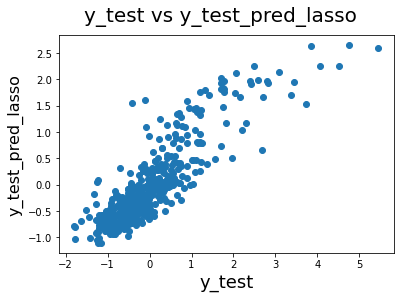

In [70]:
# Plotting y_test and y_test_pred_lasso to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred_lasso)
fig.suptitle('y_test vs y_test_pred_lasso', fontsize = 20)               
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_test_pred_lasso', fontsize = 16)

# Conclusion

## Ridge Regression conclusion:

In [71]:
#Analysing Ridge Regression coefficients

Ridge_coefficients = pd.DataFrame({"Features": test_columns, "Ridge_Coef":ridgereg.coef_})
print(Ridge_coefficients.sort_values('Ridge_Coef'))

                Features  Ridge_Coef
11        KitchenQual_Fa   -0.555252
13        KitchenQual_TA   -0.512780
21         OverallQual_4   -0.416929
20         OverallQual_3   -0.408473
15             PoolQC_Gd   -0.368522
5        Condition2_PosN   -0.347223
12        KitchenQual_Gd   -0.281021
22         OverallQual_5   -0.268269
7        BldgType_Duplex   -0.206487
19         OverallQual_2   -0.149217
9            BsmtCond_Po   -0.131349
14             PoolQC_Fa   -0.016330
1               PoolArea    0.009131
6        Condition2_RRAe    0.070796
16          SaleType_Con    0.103202
2          LandSlope_Sev    0.134823
17          SaleType_New    0.148734
28          GarageCars_4    0.155658
0               1stFlrSF    0.255833
23         OverallQual_7    0.258287
3   Neighborhood_Crawfor    0.271564
8       RoofMatl_WdShngl    0.295762
10       BsmtExposure_Gd    0.318573
24         OverallQual_8    0.496721
27          GarageCars_3    0.539388
26            FullBath_3    0.665787
4

#### We can conclude the following from Ridge regression about following features for the prediction of House prices:

- The overall condition of the house being 'Very Excellent', 'Excellent' & 'Very Good' contributes majorly for the house price.
- The location houses at the location 'North ridge' also contributes majorly for the house price.
- '3 Full Bathrooms' above Grade contributes significantly for the house price.
- The 'garage having 3 car capacity' also contributes significantly for the house price.
- The 'Basement with Good Exposure' to walkout or garden level walls also contributes significantly for the house price.

#### The optimal value of the hyperparameter lambda for the Ridge regression was found to be '10'.

## Lasso Regression conclusion:

In [72]:
#Analysing Lasso Regression coefficients

Lasso_coefficients = pd.DataFrame({"Features": test_columns, "Lasso_Coef":lassoreg.coef_})
print(Lasso_coefficients.sort_values('Lasso_Coef'))

                Features  Lasso_Coef
21         OverallQual_4   -0.346572
13        KitchenQual_TA   -0.288342
22         OverallQual_5   -0.236399
11        KitchenQual_Fa   -0.185161
20         OverallQual_3   -0.057539
7        BldgType_Duplex   -0.054023
14             PoolQC_Fa   -0.000000
19         OverallQual_2   -0.000000
16          SaleType_Con    0.000000
15             PoolQC_Gd   -0.000000
12        KitchenQual_Gd   -0.000000
28          GarageCars_4    0.000000
9            BsmtCond_Po   -0.000000
8       RoofMatl_WdShngl    0.000000
1               PoolArea    0.000000
6        Condition2_RRAe    0.000000
5        Condition2_PosN   -0.000000
2          LandSlope_Sev    0.000000
3   Neighborhood_Crawfor    0.025741
17          SaleType_New    0.039150
23         OverallQual_7    0.229132
10       BsmtExposure_Gd    0.258807
0               1stFlrSF    0.286159
24         OverallQual_8    0.470083
4   Neighborhood_NoRidge    0.550293
26            FullBath_3    0.572482
2

#### We can conclude the following from Lasso regression about following features for the prediction of House prices:

- The overall condition of the house being 'Very Excellent', 'Excellent' & 'Very Good' contributes majorly for the house price.
- The 'garage having 3 car capacity' also contributes majorly for the house price.
- '3 Full Bathrooms' above Grade contributes significantly for the house price.
- The location houses at the location 'North ridge' also contributes significantly for the house price.
- The houses with high 'First Floor square feet' also contributes significantly for the house price.

#### The optimal value of the hyperparameter lambda for the Lasso regression was found to be '0.01'.